# Exercise 1.4 & Problem 1.4:
Generate a 2-dimensional data set of size 20. Try the perceptron learning algorithm on your data set and see how long it takes to converge and how well the final hypothesis $g$ matches your target $f$. This will be a good start to Problem 1.4. 

For this notebook you will need to import the following packages:
* Plots [documentation](http://docs.juliaplots.org/latest/) 

In [225]:
using Plots

In [226]:
# Linear seperable data function 
function make_linearily_separable_data(n)
    coeff = rand(2)
    X = rand(n,2)
    above = []
    below = []
    
    for i = 1:n
        if coeff[1]*X[i,1] + coeff[2] < X[i,2]
            push!(above, (X[i,1], X[i,2]))
        end
        if coeff[1]*X[i,1] + coeff[2] > X[i,2]
            push!(below, (X[i,1], X[i,2]))
        end
    end
    
    return above, below, coeff
end 

make_linearily_separable_data (generic function with 1 method)

In [227]:
# Make random collection of linearily seperable data
above, below, coeff = make_linearily_separable_data(20)

(Any[(0.409988, 0.921785), (0.0871985, 0.686887), (0.101723, 0.812265)], Any[(0.718698, 0.637529), (0.599411, 0.529496), (0.319417, 0.726862), (0.612036, 0.772113), (0.711599, 0.863185), (0.333765, 0.142582), (0.9492, 0.222189), (0.595067, 0.673127), (0.829168, 0.658216), (0.194394, 0.00561399), (0.390034, 0.358704), (0.655583, 0.894788), (0.890401, 0.283174), (0.985885, 0.673597), (0.836757, 0.602071), (0.568198, 0.87086), (0.813606, 0.370278)], [0.8382, 0.534302])

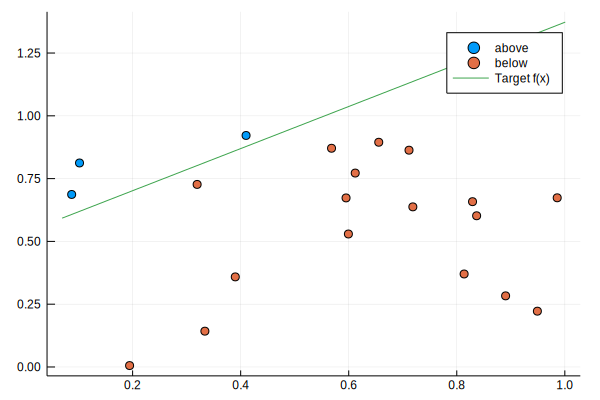

In [228]:
scatter([x for x in above], label="above")
scatter!([x for x in below], label="below")
plot!(x->coeff[1]*x + coeff[2], label = "Target f(x)")

In [229]:
# Make data arrays 
Y = [1 for _ in above]
D = [x for x in above]
for x in below
    push!(D, x)
    push!(Y, -1)
end
Y
D

20-element Array{Tuple{Float64,Float64},1}:
 (0.40998798909483214, 0.9217848259733452) 
 (0.0871985390616632, 0.6868872717858154)  
 (0.10172253295196043, 0.812264803716676)  
 (0.7186976352220167, 0.6375294574029888)  
 (0.5994112999685663, 0.5294960570399241)  
 (0.3194171671728978, 0.7268623147109652)  
 (0.612036319008511, 0.7721134428083964)   
 (0.7115989598155115, 0.86318513974352)    
 (0.3337646177206415, 0.14258232487279288) 
 (0.9491998537651201, 0.2221890601063159)  
 (0.5950673330687235, 0.6731273002955043)  
 (0.8291681669853435, 0.6582162691123716)  
 (0.1943935309036975, 0.005613993567065156)
 (0.3900337756823904, 0.3587042641748095)  
 (0.6555832178477206, 0.8947882788764625)  
 (0.8904006709905394, 0.2831742766730756)  
 (0.9858848142753924, 0.6735969753782323)  
 (0.8367566083435376, 0.602070884489248)   
 (0.5681978213451162, 0.8708598224809267)  
 (0.8136057344688719, 0.3702776911485508)  

In [230]:
# Assign random weights
w = rand(3)

# Perceptron Hypothesis Function 
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

# Perceptron Learning Algorithm 
function PLA!(w, x, y)
    if h(w, x) != y
        w += y*[1.0, x[1], x[2]]
    end
    return w
end

PLA! (generic function with 1 method)

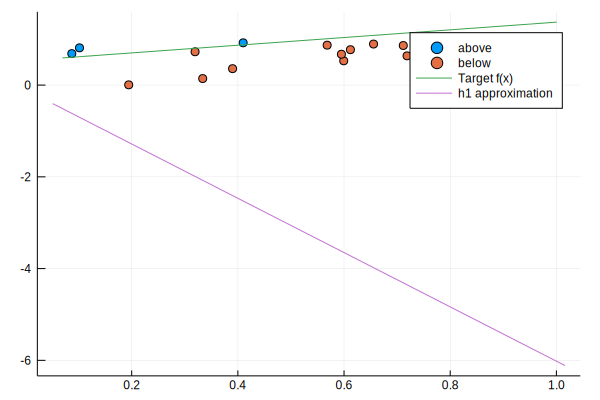

In [231]:
# Plot the initial hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="h1 approximation")

In [232]:
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in D], [x[1] == 1 ? 1 : -1 for x in Y]

(Array{Float64,1}[[0.409988, 0.921785], [0.0871985, 0.686887], [0.101723, 0.812265], [0.718698, 0.637529], [0.599411, 0.529496], [0.319417, 0.726862], [0.612036, 0.772113], [0.711599, 0.863185], [0.333765, 0.142582], [0.9492, 0.222189], [0.595067, 0.673127], [0.829168, 0.658216], [0.194394, 0.00561399], [0.390034, 0.358704], [0.655583, 0.894788], [0.890401, 0.283174], [0.985885, 0.673597], [0.836757, 0.602071], [0.568198, 0.87086], [0.813606, 0.370278]], [1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [233]:
# Iterate the PLA 
for j = 1:20
    w = PLA!(w, X[j], Y[j])
end
w

3-element Array{Float64,1}:
 -0.9907446971298803 
 -0.17457911786449265
 -0.5455872411268008 

*It tooks 3 updates to converge.*

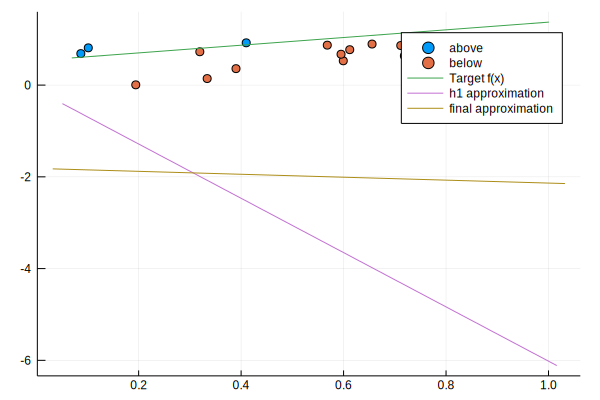

In [234]:
# Plot the initial hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation")

*The final approximation g(x) is really far from the line f(x).*

In [235]:
# Test your predictions!
function predictor(n)
    return h(w, X[n]) == 1 ? "Above" : "Below"
end
predictor(10)

"Below"

**Repeat for another dataset size 20**

In [236]:
# Make random collection of linearily seperable data
above, below, coeff = make_linearily_separable_data(20)

(Any[(0.639488, 0.549906), (0.459591, 0.55337), (0.502055, 0.54344), (0.190215, 0.964982), (0.875236, 0.587686), (0.398751, 0.812131), (0.446602, 0.631729), (0.797802, 0.512467), (0.180906, 0.73636), (0.0247822, 0.615833), (0.359641, 0.514126), (0.3109, 0.577764), (0.106305, 0.228309)], Any[(0.53837, 0.142729), (0.809072, 0.341496), (0.805185, 0.456991), (0.151835, 0.0840527), (0.474334, 0.176059), (0.537021, 0.0704049), (0.315608, 0.0508476)], [0.351576, 0.178756])

In [237]:
# Make data arrays 
Y = [1 for _ in above]
D = [x for x in above]
for x in below
    push!(D, x)
    push!(Y, -1)
end
Y
D
# Assign random weights
w = rand(3)

3-element Array{Float64,1}:
 0.3101904110414895 
 0.7240973525655485 
 0.14383771986055094

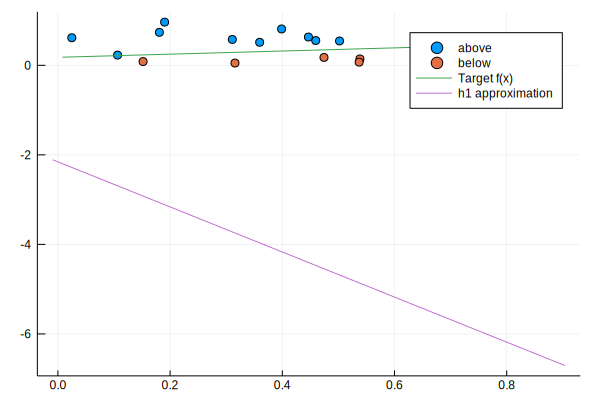

In [238]:
scatter([x for x in above], label="above")
scatter!([x for x in below], label="below")
plot!(x->coeff[1]*x + coeff[2], label = "Target f(x)")
# Plot the initial hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="h1 approximation")

In [239]:
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in D], [x[1] == 1 ? 1 : -1 for x in Y]
# Iterate the PLA  
for j = 1:20
    w = PLA!(w, X[j], Y[j])
end
w

3-element Array{Float64,1}:
 -0.6898095889585105  
  0.1857271933463962  
  0.001108641573683844

*It tooks 3 updates to converge.*

In [240]:
predictor(5)

"Below"

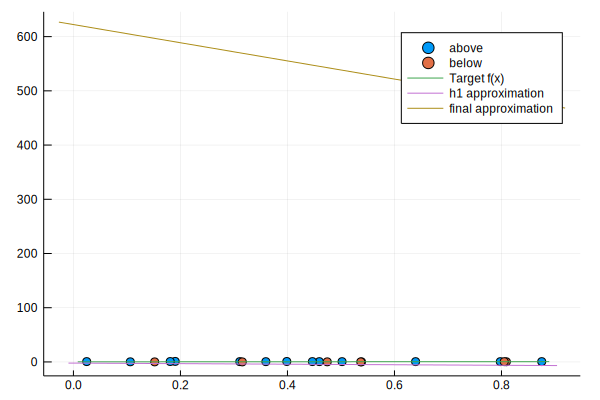

In [241]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation")

*The final approximation g(x) is really close to the line f(x), closer than the result of b).*

**Repeat for another dataset size 100**

In [270]:
# Make random collection of linearily seperable data
above, below, coeff = make_linearily_separable_data(100)
# Make data arrays 
Y = [1 for _ in above]
D = [x for x in above]
for x in below
    push!(D, x)
    push!(Y, -1)
end
Y
D
scatter([x for x in above], label="above")
scatter!([x for x in below], label="below")
plot!(x->coeff[1]*x + coeff[2], label = "Target f(x)")
# Plot the initial hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="h1 approximation")
# Assign random weights
w = rand(3)
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in D], [x[1] == 1 ? 1 : -1 for x in Y]
# Iterate the PLA  
for j = 1:100
    w = PLA!(w, X[j], Y[j])
end
w

3-element Array{Float64,1}:
 -0.26297694129963656
 -0.1731984888118181 
  0.3041498056558207 

*It tooks 3 updates to converge.*

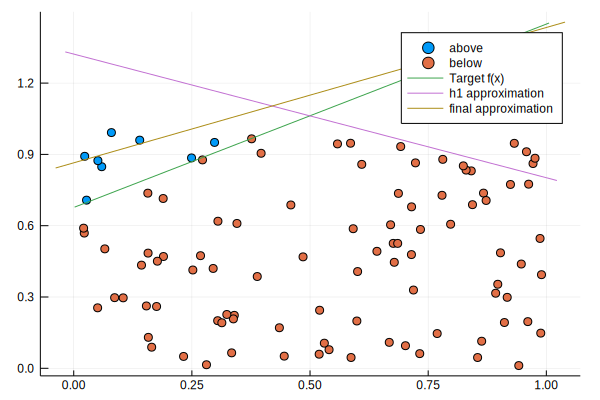

In [271]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation")

*The final approximation g(x) is really close to the line f(x), but not as good as the result of b).*

**Repeat for data size of 1000**

In [298]:
# Make random collection of linearily seperable data
above, below, coeff = make_linearily_separable_data(1000)
# Make data arrays 
Y = [1 for _ in above]
D = [x for x in above]
for x in below
    push!(D, x)
    push!(Y, -1)
end
Y
D
scatter([x for x in above], label="above")
scatter!([x for x in below], label="below")
plot!(x->coeff[1]*x + coeff[2], label = "Target f(x)")
# Plot the initial hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="h1 approximation")
# Assign random weights
w = rand(3)
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in D], [x[1] == 1 ? 1 : -1 for x in Y]
# Iterate the PLA 
for j = 1:20
    w = PLA!(w, X[j], Y[j])
end
# Iterate the PLA 
for j = 1:1000
    w = PLA!(w, X[j], Y[j])
end
w

3-element Array{Float64,1}:
 -0.15393935163061423
 -0.29281637218779233
  0.5683026763933321 

*It took 3 updates to converge*

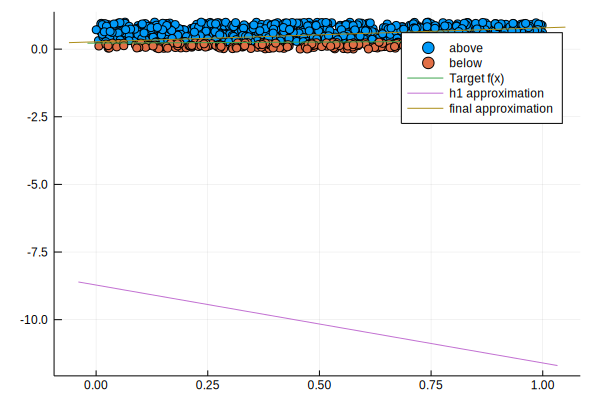

In [299]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation")

*The final approximation g(x) is very close to the line f(x), so it is better than the result of b).*

**Row space of 10 instead of 2:**

In [256]:
# Linear seperable data function 
function make_linearily_separable_data10(n)
    coeff = rand(10)
    X = rand(n,10)
    above = []
    below = []
    
    for i = 1:n
        if coeff[1]*X[i,1] + coeff[2]*X[i,2] + coeff[3]*X[i,3] + coeff[4]*X[i,4] + coeff[5]*X[i,5] + coeff[6]*X[i,6] + coeff[7]*X[i,7] + coeff[8]*X[i,8] + coeff[9]*X[i,9 ] + coeff[10] < X[i,10]
            push!(above, (X[i,1], X[i,2], X[i,3], X[i,4], X[i,5],X[i,6], X[i,7], X[i,8], X[i,9], X[i,10]))
        end
        if coeff[1]*X[i,1] + coeff[2]*X[i,2] + coeff[3]*X[i,3] + coeff[4]*X[i,4] + coeff[5]*X[i,5] + coeff[6]*X[i,6] + coeff[7]*X[i,7] + coeff[8]*X[i,8] + coeff[9]*X[i,9 ] + coeff[10] > X[i,10]
            push!(above, (X[i,1], X[i,2], X[i,3], X[i,4], X[i,5],X[i,6], X[i,7], X[i,8], X[i,9], X[i,10]))
        end
    end
    
    return above, below, coeff
end 

# Make random collection of linearily seperable data
above, below, coeff = make_linearily_separable_data10(1000)


(Any[(0.763597, 0.878864, 0.000202328, 0.130094, 0.915934, 0.272384, 0.615181, 0.476601, 0.382851, 0.703272), (0.333335, 0.291216, 0.432716, 0.600256, 0.927301, 0.960727, 0.497782, 0.0675593, 0.335282, 0.75734), (0.372702, 0.662807, 0.634795, 0.827736, 0.0123263, 0.762912, 0.171688, 0.881211, 0.820182, 0.0755146), (0.673445, 0.566063, 0.655385, 0.819223, 0.270374, 0.0497896, 0.114678, 0.577359, 0.0110832, 0.469373), (0.836945, 0.684023, 0.689498, 0.255054, 0.439665, 0.864644, 0.644284, 0.833891, 0.21818, 0.658115), (0.53255, 0.725464, 0.141663, 0.392909, 0.746115, 0.0275016, 0.426388, 0.958757, 0.941595, 0.89613), (0.335775, 0.811845, 0.200914, 0.0484612, 0.563066, 0.656584, 0.828626, 0.833795, 0.0949713, 0.726014), (0.963979, 0.664251, 0.400318, 0.668532, 0.213139, 0.743487, 0.372543, 0.719181, 0.432668, 0.27762), (0.28252, 0.550572, 0.334172, 0.566547, 0.822185, 0.838658, 0.516231, 0.978462, 0.812209, 0.943926), (0.882182, 0.640477, 0.627615, 0.300591, 0.714091, 0.256669, 0.394491, 0

In [257]:
# Make data arrays 
Y = [1 for _ in above]
D = [x for x in above]
for x in below
    push!(D, x)
    push!(Y, -1)
end
Y
D
# Assign random weights
w = rand(3)
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2], x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10]] for x in D], [x[1] == 1 ? 1 : -1 for x in Y]
# Iterate the PLA  
for j = 1:1000
    w = PLA!(w, X[j], Y[j])
end
w

3-element Array{Float64,1}:
 0.15631357249137134 
 0.060847126015914466
 0.5304633264291805  

*It still takes on 3 updates to converge*

In [306]:
# Make data arrays 
above, below, coeff = make_linearily_separable_data10(1000)
Y = [1 for _ in above]
D = [x for x in above]
for x in below
    push!(D, x)
    push!(Y, -1)
end
Y
D
# Assign random weights
w = rand(3)
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2], x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10]] for x in D], [x[1] == 1 ? 1 : -1 for x in Y]
# Iterate the PLA  
updates = []
for i = 1:100
    j = rand(1:1000)
    w = PLA!(w, X[j], Y[j])
    updates = push!(updates, length(w))
end
w

100-element Array{Any,1}:
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

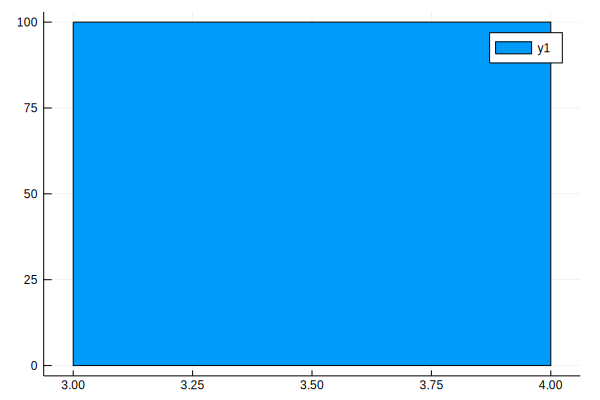

In [307]:
histogram(updates)

*The number of updates from part a-g is all 3. Therefore, the histogram only consists of 1 bins.*

Conclusions:
The larger the data size (N) we have, the more accurate the model gets (g(x) approximation gets closer to f(x)).
The model has the same run time across all d. 